# 

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from joblib import dump, load
import seaborn as sns
import os

# 

# Preparing Data

In [2]:
#Reading the data
df1 = pd.read_csv('C:/Users/Dr Juned bhai/Desktop/IMPORTANTS/PROJECTS/KIRANA/Section 1/DATA/Data(2009-10).csv', encoding = 'unicode_escape')
df2 = pd.read_csv('C:/Users/Dr Juned bhai/Desktop/IMPORTANTS/PROJECTS/KIRANA/Section 1/DATA/Data(2010-11).csv', encoding = 'unicode_escape')
df2 = df2.drop(axis=1,labels={'Unnamed: 0'})

#Merging two DataFrames
df = pd.concat([df1, df2], axis=0)
df.reset_index()

#Adding new column for total pricing
df['Total Cost'] = df['Quantity'] * df['Price']

#Dropping NAN values & outliers
df = df.dropna()
df = df[(df['Quantity'] <= 10000) & (df['Quantity'] >= -10000)]
df = df[df['Price'] < 20000]

X = df.drop(labels = {'Invoice','Description','InvoiceDate','StockCode'},axis=1)
X = pd.get_dummies(X)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0


# 

# Choosing the optimal value of K

`Hence, from the below conclusion, we finalize the value of K = 4 (using the elbow method). As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.`

In [9]:
ssd = []
    
for k in range(2,13):
    
    model = KMeans(n_clusters=k)    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

# 

## Elbow method from K = 2 to 13 (Sum of Squared Distances)

Text(0, 0.5, ' Sum of Squared Distances')

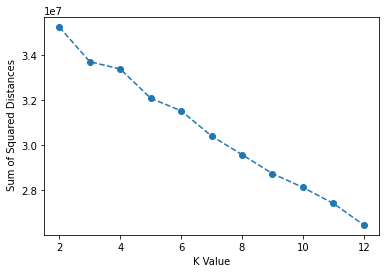

In [13]:
plt.plot(range(2,13),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

# 

# Finalizing Model 
`Using the elbow method, we finalize K = 4`

In [4]:
model = KMeans(n_clusters=4)
cluster_labels = model.fit_predict(scaled_X)
X['Cluster'] = cluster_labels
#dump(model, 'K-means2.joblib') 

['K-means2.joblib']

<AxesSubplot:xlabel='Cluster', ylabel='Price'>

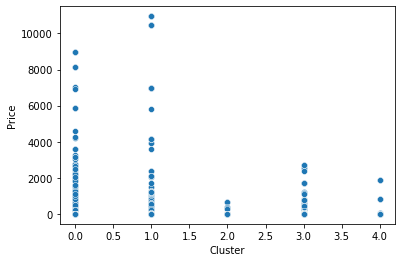

In [27]:
sns.scatterplot(data=X, x='Cluster', y='Price')

# `The five obvious clusters in our dataset, found using the model`

# 